In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



### Data Wrangling

In [2]:
path = 'Datasets/Sleep.csv'
df = pd.read_csv(path)

In [3]:
df.head()

Person ID Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0          1   Male   27  Software Engineer             6.1                 6   
1          2   Male   28             Doctor             6.2                 6   
2          3   Male   28             Doctor             6.2                 6   
3          4   Male   28  Software Engineer             5.9                 4   
4          5   Male   28  Software Engineer             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps Sleep Disorder  BP High  BP Low  
0         4200    No Disorder      126      83  
1        10000    No Disorder      125      80  
2        10000    No Disorder      125      80  
3         3000    Sleep Apnea      140      90  
4         3000    Sleep Apnea      140      90

In [4]:
df.tail()

Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily Steps Sleep Disorder  BP High  BP Low  
369         7000    Sleep Apnea      140      95  
370         7000    Sleep Apnea      140      95  
371         7000    Sleep Apnea      140      95  
372         7000    Sleep Apnea      140      95  
373         7000    Sleep Apnea      140      95

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BP High                  374 non-null    int64  
 13  BP Low                   374 non-null    int64  
dtypes: float64(1), int64(9), o

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BP High', 'BP Low'],
      dtype='object')

In [7]:
df.shape

(374, 14)

In [8]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BP High                    0
BP Low                     0
dtype: int64

In [9]:
df.describe().round(2)

Person ID     Age  Sleep Duration  Quality of Sleep  \
count     374.00  374.00          374.00            374.00   
mean      187.50   42.18            7.13              7.31   
std       108.11    8.67            0.80              1.20   
min         1.00   27.00            5.80              4.00   
25%        94.25   35.25            6.40              6.00   
50%       187.50   43.00            7.20              7.00   
75%       280.75   50.00            7.80              8.00   
max       374.00   59.00            8.50              9.00   

       Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
count                   374.00        374.00      374.00       374.00   
mean                     59.17          5.39       70.17      6816.84   
std                      20.83          1.77        4.14      1617.92   
min                      30.00          3.00       65.00      3000.00   
25%                      45.00          4.00       68.00      5600.00   
50%                      60.00          5.00       70.00      7000.00   
75%                      75.00          7.00       72.00      8000.00   
max                      90.00          8.00       86.00     10000.00   

       BP High  BP Low  
count   374.00  374.00  
mean    128.55   84.65  
std       7.75    6.16  
min     115.00   75.00  
25%     125.00   80.00  
50%     130.00   85.00  
75%     135.00   90.00  
max     142.00   95.00

In [10]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [11]:
df['Occupation'].value_counts()

Occupation
Software Engineer    109
Nurse                 73
Doctor                71
Lawyer                47
Accountant            37
Salesperson           32
Scientist              4
Manager                1
Name: count, dtype: int64

In [12]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [13]:
df.loc[df['BMI Category']=='Normal Weight','BMI Category'] = 'Normal'
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [14]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [15]:
df['Sick'] = np.nan

for i in range(len(df)):
    if df.loc[i,'Sleep Disorder'] != 'No Disorder':
        df.loc[i,'Sick'] = 1
    else:
        df.loc[i,'Sick'] = 0

df['Sick'] = df['Sick'].astype(int)
df['Sick'].value_counts()

Sick
0    219
1    155
Name: count, dtype: int64

### Data Visualization

#### Correlation Matrix

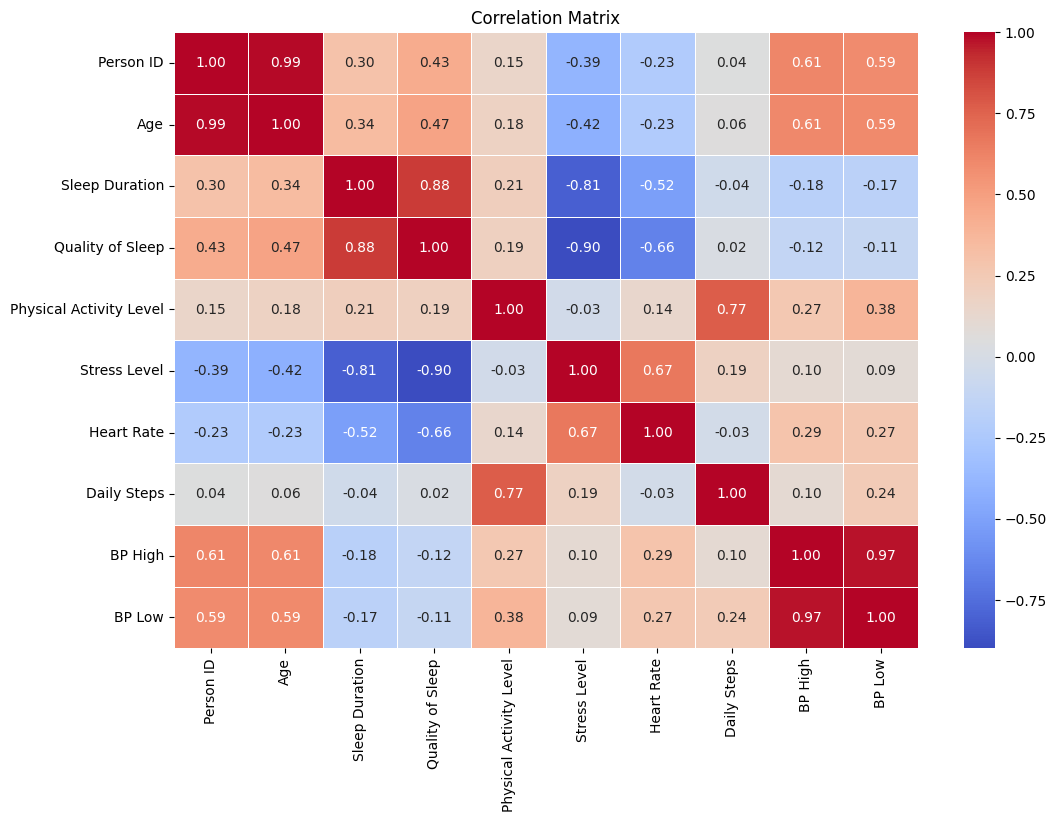

In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### How is the relation between variables and stress level

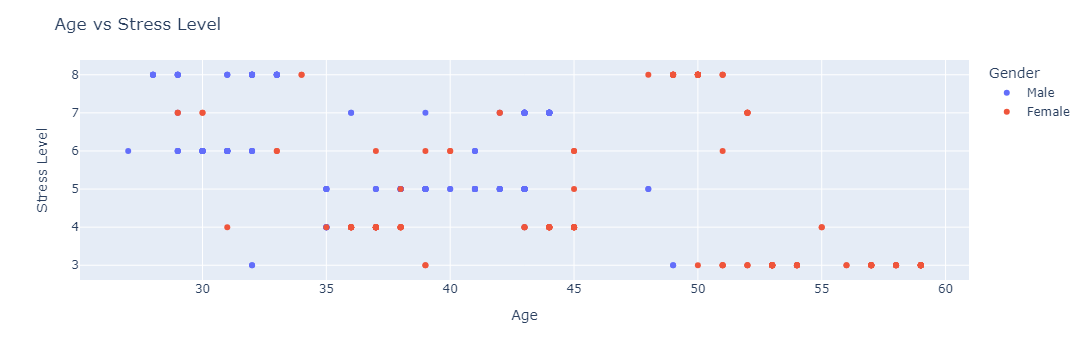

In [17]:
fig = px.scatter(df, x="Age", y="Stress Level", color="Gender")
fig.update_layout(
    title="Age vs Stress Level",
    xaxis_title="Age",
    yaxis_title="Stress Level",
    font=dict(
        size=12
    )
)
fig.show()

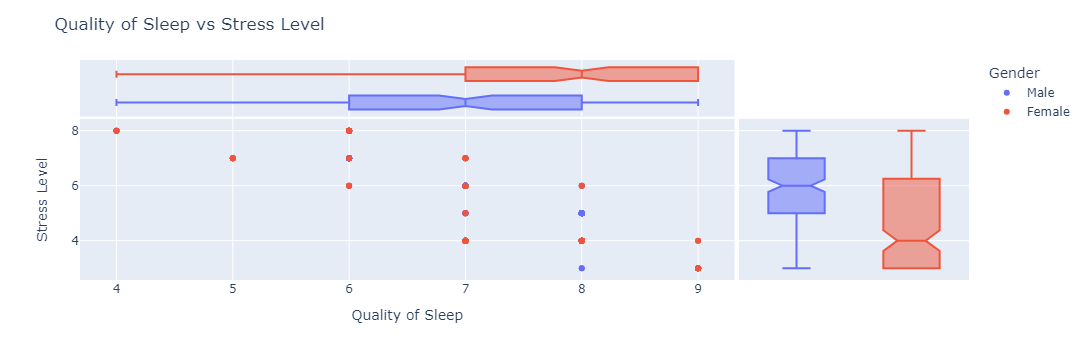

In [18]:
fig = px.scatter(df, x='Quality of Sleep', y='Stress Level', color='Gender', marginal_y='box', marginal_x='box')
fig.update_layout(
    title='Quality of Sleep vs Stress Level',
    xaxis_title='Quality of Sleep',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    )
)
fig.show()

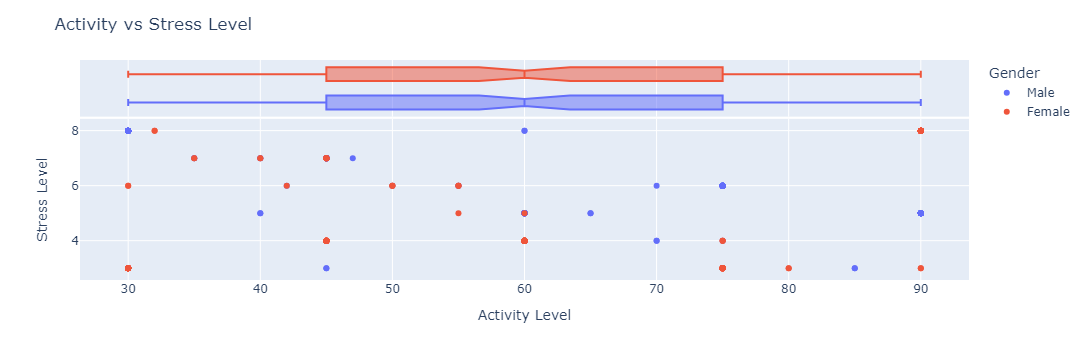

In [19]:
fig = px.scatter(df, x='Physical Activity Level', y='Stress Level', color='Gender', marginal_x='box')
fig.update_layout(
    title='Activity vs Stress Level',
    xaxis_title='Activity Level',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    )
)
fig.show()

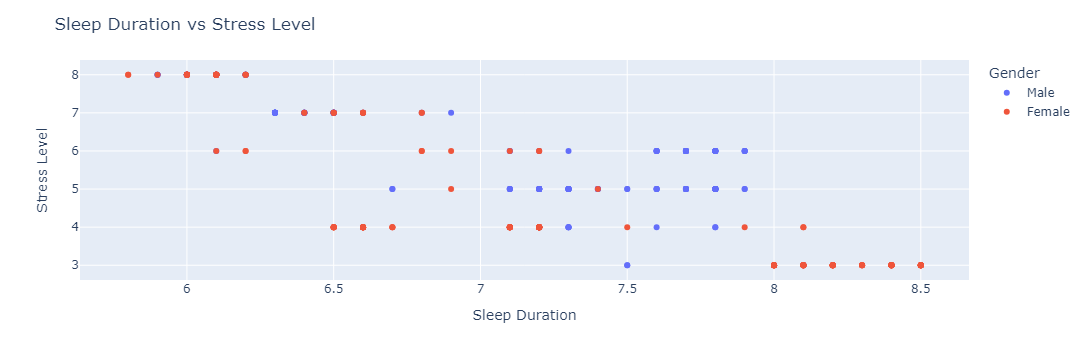

In [20]:
fig = px.scatter(df, x='Sleep Duration', y='Stress Level', color='Gender')
fig.update_layout(
    title='Sleep Duration vs Stress Level',
    xaxis_title='Sleep Duration',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    )
)
fig.show()

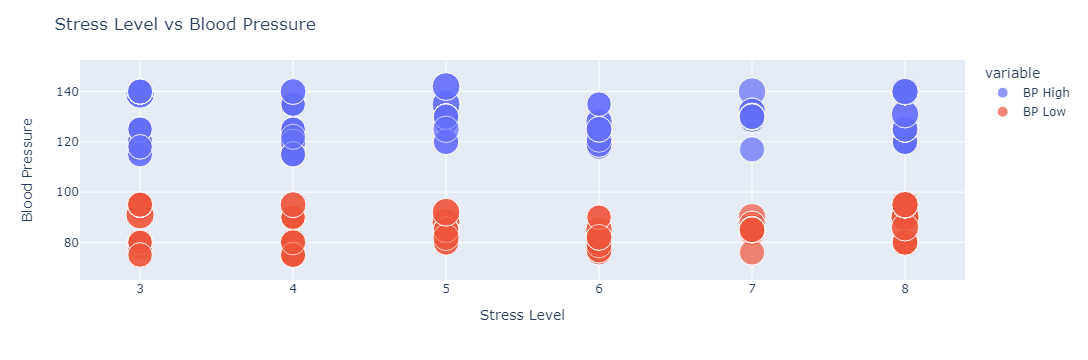

In [21]:
fig = px.scatter(df, x='Stress Level', y=['BP High', 'BP Low'], size='Heart Rate')
fig.update_layout(
    title='Stress Level vs Blood Pressure',
    xaxis_title='Stress Level',
    yaxis_title='Blood Pressure',
    font = dict(
        size=12
    )
)
fig.show()

#### Demographic Analysis

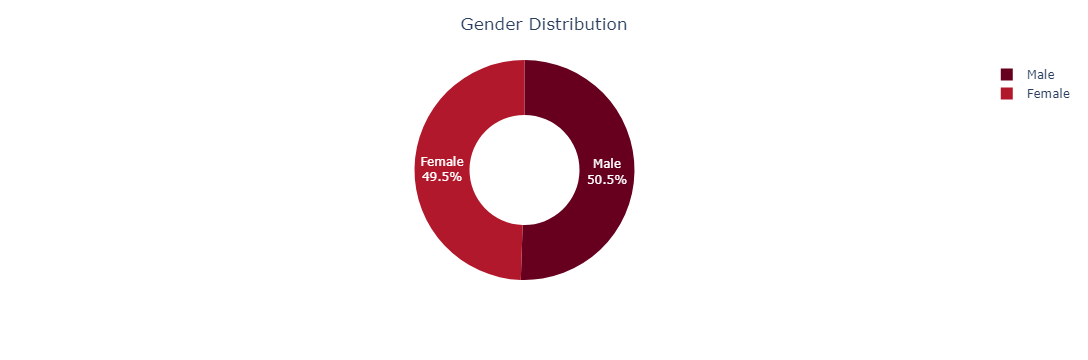

In [22]:
gender = df.groupby('Gender').size().reset_index(name='Count')

fig = px.pie(gender, values='Count', names='Gender',
            hole=.5,
            color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_layout(
    title='Gender Distribution',
    font = dict(
        size=12
    ),
    width=500,
    title_x=.5
)

# show label name and percentage as a name
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

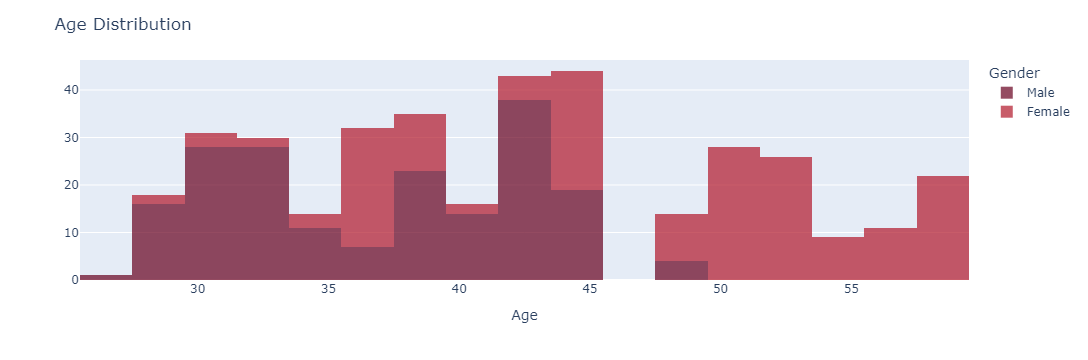

In [23]:
fig = px.histogram(df, x='Age', nbins=20, color_discrete_sequence=px.colors.sequential.RdBu, color='Gender')
fig.update_traces(opacity=0.7)
fig.update_layout(
    title='Age Distribution',
    xaxis_title='Age',
    yaxis_title=None,
    font = dict(
        size=12
    ),
    width=900
)
fig.show()

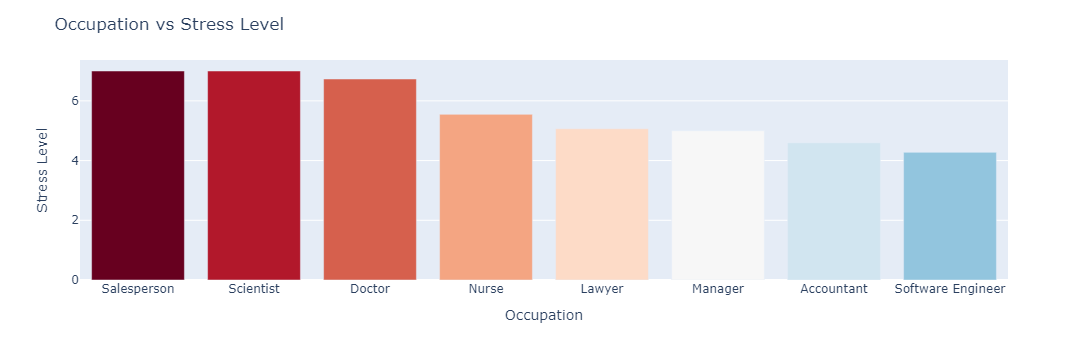

In [24]:
occupation_stress_level = df.groupby('Occupation')['Stress Level'].mean().reset_index(name='Stress Level').sort_values(by='Stress Level', ascending=False)

fig = px.bar(occupation_stress_level, x='Occupation', y='Stress Level', color='Occupation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title='Occupation vs Stress Level',
    xaxis_title='Occupation',
    yaxis_title='Stress Level',
    font = dict(
        size=12
    ),
    width=900,
    showlegend=False
)
fig.show()

In [25]:
sleep_do_bp = df.groupby('Sleep Disorder')[['BP High', 'BP Low']].mean().reset_index();sleep_do_bp
df_bp = pd.melt(sleep_do_bp, id_vars='Sleep Disorder', var_name='Blood Pressure Type', value_name='Pressure Value');df_bp

Sleep Disorder Blood Pressure Type  Pressure Value
0       Insomnia             BP High      132.038961
1    No Disorder             BP High      124.045662
2    Sleep Apnea             BP High      137.769231
3       Insomnia              BP Low       86.857143
4    No Disorder              BP Low       81.000000
5    Sleep Apnea              BP Low       92.717949

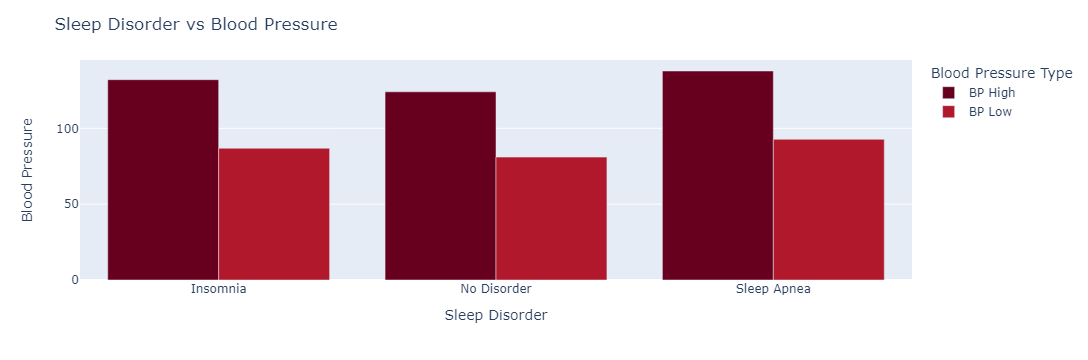

In [26]:
fig = px.bar(
    df_bp,
    x='Sleep Disorder',
    y='Pressure Value',
    color='Blood Pressure Type',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title='Sleep Disorder vs Blood Pressure',
    xaxis_title='Sleep Disorder',
    yaxis_title='Blood Pressure',
    font = dict(
        size=12
    ),
    width=900
)
fig.show()

In [27]:
bmi_bpressure = df.groupby('BMI Category')[['BP High', 'BP Low']].mean().reset_index();bmi_bpressure
bmi_df = pd.melt(bmi_bpressure, id_vars='BMI Category', var_name='Blood Pressure Type', value_name='Pressure Value');bmi_df

BMI Category Blood Pressure Type  Pressure Value
0       Normal             BP High      123.606481
1        Obese             BP High      139.200000
2   Overweight             BP High      135.054054
3       Normal              BP Low       80.601852
4        Obese              BP Low       90.200000
5   Overweight              BP Low       90.182432

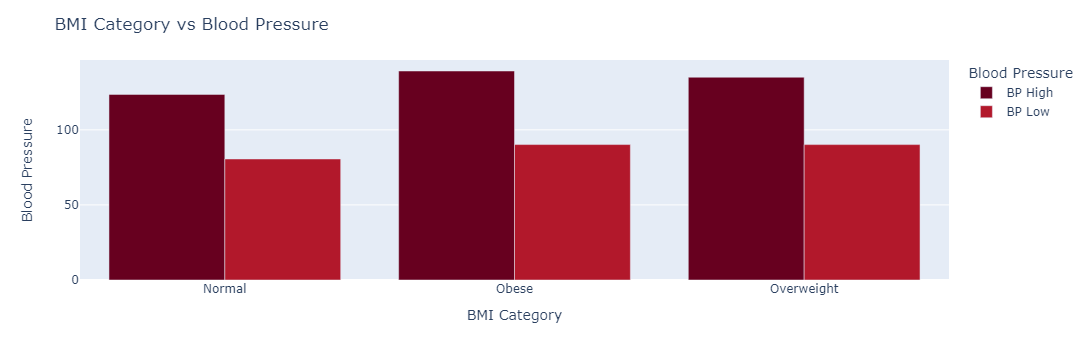

In [28]:
fig = px.bar(
    bmi_df,
    x='BMI Category',
    y='Pressure Value',
    color='Blood Pressure Type',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_layout(
    title='BMI Category vs Blood Pressure',
    xaxis_title='BMI Category',
    yaxis_title='Blood Pressure',
    legend_title='Blood Pressure',
    font = dict(
        size=12
    ),
    width=900
)
fig.show()

#### Pair Plot

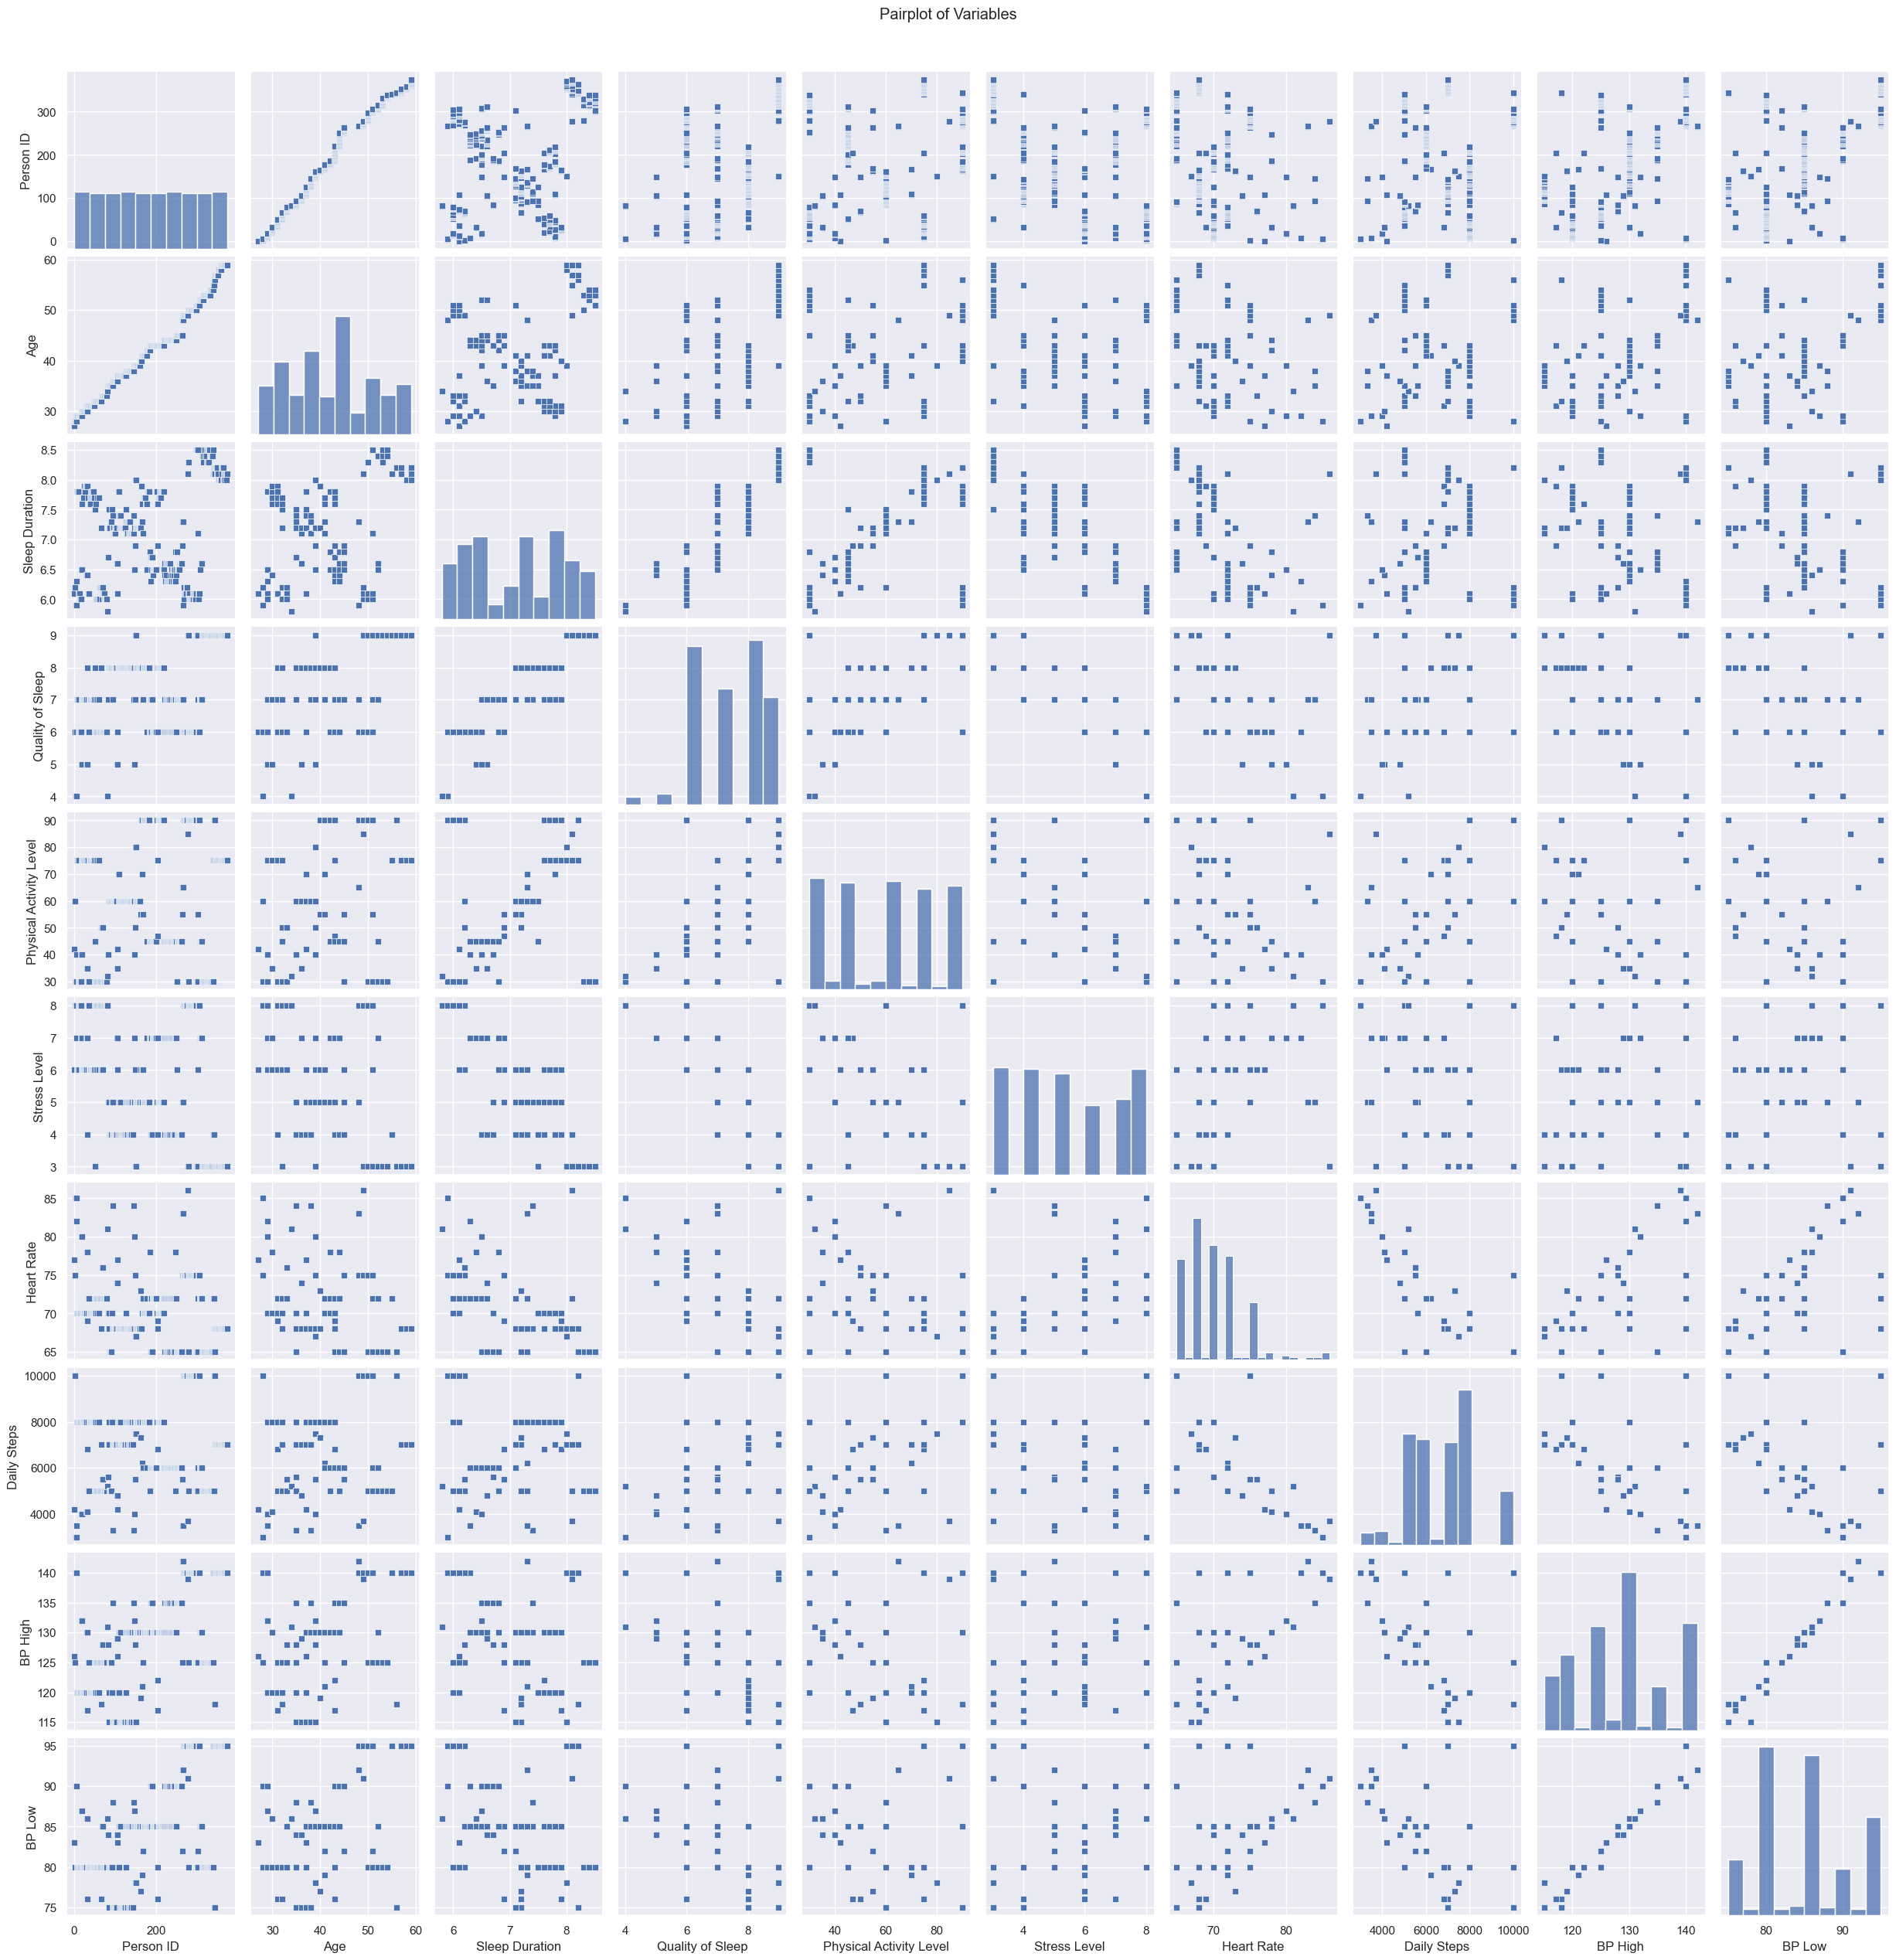

In [29]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
import warnings
# Set a custom style
sns.set(style="darkgrid")

# Suppress the specific warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Create a pairplot with customized style
    sns.pairplot(numeric_df, diag_kind="hist", markers="s", palette="viridis")
    plt.suptitle('Pairplot of Variables', y=1.02)
    plt.show()

### Model Traning

In [30]:
X = df.drop(['Person ID', 'Stress Level'], axis=1)
y = df[['Stress Level']]

In [31]:
X.head(3)

Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27  Software Engineer             6.1                 6   
1   Male   28             Doctor             6.2                 6   
2   Male   28             Doctor             6.2                 6   

   Physical Activity Level BMI Category  Heart Rate  Daily Steps  \
0                       42   Overweight          77         4200   
1                       60       Normal          75        10000   
2                       60       Normal          75        10000   

  Sleep Disorder  BP High  BP Low  Sick  
0    No Disorder      126      83     0  
1    No Disorder      125      80     0  
2    No Disorder      125      80     0

In [32]:
from sklearn.preprocessing import LabelEncoder

categoric = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
le = LabelEncoder()

for column in categoric:
    X[column] = le.fit_transform(X[column])

In [33]:
from sklearn.preprocessing import StandardScaler

numeric = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'BP High', 'BP Low']
scaler = StandardScaler()

for column in numeric:
    X[column] = scaler.fit_transform(X[column].values.reshape(-1,1))

In [34]:
y.head(3)

Stress Level
0             6
1             8
2             8

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create a pipeline for Linear Regression with standardization

linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [37]:
# Evaluate Linear Regression

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

In [38]:
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R-squared: {linear_r2}")

Linear Regression:
Mean Squared Error: 0.13157840180849717
Mean Absolute Error: 0.2489498157035418
R-squared: 0.9578850284412884


In [39]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam())
    return model


In [40]:
# Reshape X_train and X_test for GRU input
X_train_gru = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [41]:
# Create tf.data.Dataset for better performance
train_dataset_gru = tf.data.Dataset.from_tensor_slices((X_train_gru, y_train))
test_dataset_gru = tf.data.Dataset.from_tensor_slices((X_test_gru, y_test))


In [42]:
# Batch and prefetch for better performance
train_dataset_gru = train_dataset_gru.shuffle(buffer_size=len(X_train)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_gru = test_dataset_gru.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [43]:
# Create and train GRU model
gru_model = create_gru_model()


In [44]:
# Set up callbacks
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint_gru = ModelCheckpoint('best_gru_model.h5', monitor='val_loss', save_best_only=True)


In [45]:
# Train the model
gru_model.fit(train_dataset_gru, epochs=50, validation_data=test_dataset_gru, callbacks=[early_stopping_gru, model_checkpoint_gru])


Epoch 1/50
 9/10 [==========================>...] - ETA: 0s - loss: 29.9563 

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



10/10 [==============================] - 4s 113ms/step - loss: 30.0919 - val_loss: 32.7372
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 27.3012 - val_loss: 29.0677
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 22.1042 - val_loss: 20.5581
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 10.7653 - val_loss: 7.0140
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 5.8638 - val_loss: 4.7634
Epoch 6/50
10/10 [==============================] - 0s 12ms/step - loss: 4.2125 - val_loss: 4.3922
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 3.6105 - val_loss: 3.9712
Epoch 8/50
10/10 [==============================] - 0s 14ms/step - loss: 3.3400 - val_loss: 3.4355
Epoch 9/50
10/10 [==============================] - 0s 10ms/step - loss: 3.2166 - val_loss: 3.4091
Epoch 10/50
10/10 [==============================] - 0s 14ms/step - loss: 3.1582 - val_loss: 3.4843
Epoch 11/50


In [46]:
# Make predictions
gru_predictions = gru_model.predict(test_dataset_gru)


3/3 [==============================] - 1s 8ms/step


In [47]:
# Evaluate GRU model
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_r2 = r2_score(y_test, gru_predictions)

print("\nGRU Model:")
print(f"Mean Squared Error: {gru_mse}")
print(f"Mean Absolute Error: {gru_mae}")
print(f"R-squared: {gru_r2}")


GRU Model:
Mean Squared Error: 0.31696388154684885
Mean Absolute Error: 0.42552431106567384
R-squared: 0.8985477504437792


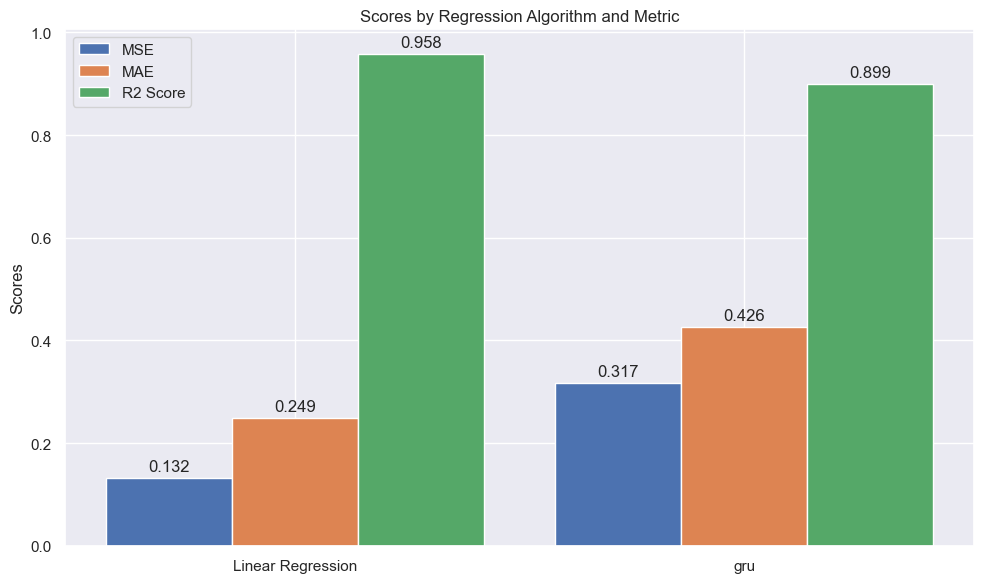

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the models
models = ['Linear Regression', 'gru']

# Metrics
mse_values = [linear_mse, gru_mse]
mae_values = [linear_mae, gru_mae]
r2_values = [linear_r2, gru_r2]

x = np.arange(len(models))  # the label locations
width = 0.28  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, mae_values, width, label='MAE')
rects3 = ax.bar(x + width, r2_values, width, label='R2 Score')

# Labeling and Layout
ax.set_ylabel('Scores')
ax.set_title('Scores by Regression Algorithm and Metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

fig.tight_layout()
plt.show()
